In [1]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

--2022-06-23 16:52:19--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.84.227.57, 2600:1406:3c:49b::e59, 2600:1406:3c:483::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.84.227.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  57.0MB/s    in 14s     

2022-06-23 16:52:34 (56.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [3]:
!ls "PetImages/"

Cat  Dog


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from tqdm import tqdm

In [5]:
len(os.listdir("PetImages/Dog"))

12501

In [6]:
len(os.listdir("PetImages/Cat"))

12501

In [7]:
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7fc5ceb79550>

In [8]:
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Cat/9786.jpg'),
 PosixPath('PetImages/Cat/5292.jpg'),
 PosixPath('PetImages/Cat/3556.jpg'),
 PosixPath('PetImages/Cat/10334.jpg'),
 PosixPath('PetImages/Cat/373.jpg'),
 PosixPath('PetImages/Cat/1280.jpg'),
 PosixPath('PetImages/Cat/6232.jpg'),
 PosixPath('PetImages/Cat/2150.jpg'),
 PosixPath('PetImages/Cat/1689.jpg'),
 PosixPath('PetImages/Cat/1201.jpg')]

In [9]:
# map to string
all_paths = list(map(lambda x: str(x), all_paths))
all_paths[:10]

['PetImages/Cat/9786.jpg',
 'PetImages/Cat/5292.jpg',
 'PetImages/Cat/3556.jpg',
 'PetImages/Cat/10334.jpg',
 'PetImages/Cat/373.jpg',
 'PetImages/Cat/1280.jpg',
 'PetImages/Cat/6232.jpg',
 'PetImages/Cat/2150.jpg',
 'PetImages/Cat/1689.jpg',
 'PetImages/Cat/1201.jpg']

In [10]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['PetImages/Dog/6813.jpg',
 'PetImages/Dog/10451.jpg',
 'PetImages/Dog/8862.jpg',
 'PetImages/Cat/3631.jpg',
 'PetImages/Dog/9558.jpg',
 'PetImages/Cat/6011.jpg',
 'PetImages/Dog/6680.jpg',
 'PetImages/Cat/1972.jpg',
 'PetImages/Cat/8193.jpg',
 'PetImages/Dog/8045.jpg']

In [11]:
def TestImageQuality(all_paths):
  new_all_paths = []
  for path in tqdm(all_paths):
    try:
      image = tf.io.read_file(path)
      image = tf.io.decode_jpeg(image, channels = 3)
    except:
      continue
    new_all_paths.append(path)
  return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:40<00:00, 610.17it/s]


['PetImages/Dog/6813.jpg',
 'PetImages/Dog/10451.jpg',
 'PetImages/Dog/8862.jpg',
 'PetImages/Cat/3631.jpg',
 'PetImages/Dog/9558.jpg',
 'PetImages/Cat/6011.jpg',
 'PetImages/Dog/6680.jpg',
 'PetImages/Cat/1972.jpg',
 'PetImages/Cat/8193.jpg',
 'PetImages/Dog/8045.jpg']

In [13]:
def get_label(image_path):
  return image_path.split("/")[-2]

all_labels = list(map(lambda x: get_label(x), all_paths))
all_labels[:10]

['Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog']

In [14]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [15]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(all_paths, all_labels)

In [16]:
Train_paths[:10], Train_labels[:10]

(['PetImages/Dog/6582.jpg',
  'PetImages/Cat/3467.jpg',
  'PetImages/Cat/8147.jpg',
  'PetImages/Cat/9981.jpg',
  'PetImages/Cat/4730.jpg',
  'PetImages/Dog/11589.jpg',
  'PetImages/Dog/6402.jpg',
  'PetImages/Cat/2239.jpg',
  'PetImages/Dog/7800.jpg',
  'PetImages/Dog/3826.jpg'],
 array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1]))

In [17]:
# Function to decode jpeg into Tensor
# Function is used as image loader

def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [19]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 128

# Basic transformation
# define Sequential object and define the augmentation methods in it
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [21]:
# Create Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE  # automatically assigns parallel_calls

def get_dataset(paths, labels, train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
    dataset = dataset.repeat()
  return dataset

In [22]:
# Create Train Dataset object and verify it

%time train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))

print(image.shape)
print(label.shape)

CPU times: user 690 ms, sys: 19 ms, total: 709 ms
Wall time: 855 ms
(128, 224, 224, 3)
(128,)


Dog


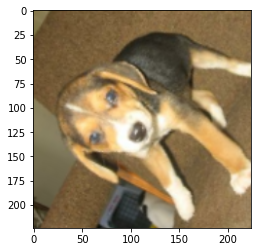

In [23]:
# View a sample of Training Images
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [25]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

# (128,) is the batch size
# 224, 224, 3 is the size of each image in the batch

CPU times: user 33.7 ms, sys: 0 ns, total: 33.7 ms
Wall time: 39.9 ms
(128, 224, 224, 3)
(128,)


Dog


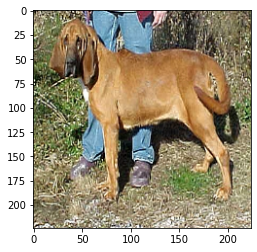

In [26]:
# View a sample Training image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [28]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))

print(image.shape)
print(label.shape)

CPU times: user 30.3 ms, sys: 0 ns, total: 30.3 ms
Wall time: 31.6 ms
(128, 224, 224, 3)
(128,)
